In [10]:
#!pip install klib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib


In [11]:

from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
print(p)

stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
ngsimfile=stringpath + '/' + 'Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv'
df = pd.read_csv(ngsimfile,low_memory=False)


original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [12]:
df.rename(columns={'v_Vel' : 'Vehicle_Velocity'}, inplace=True)

In [13]:
klib.missingval_plot(df)

GridSpec(6, 6)

MemoryError: Unable to allocate 8.83 GiB for an array with shape (296263150, 4) and data type float64

<Figure size 1440x1440 with 4 Axes>

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

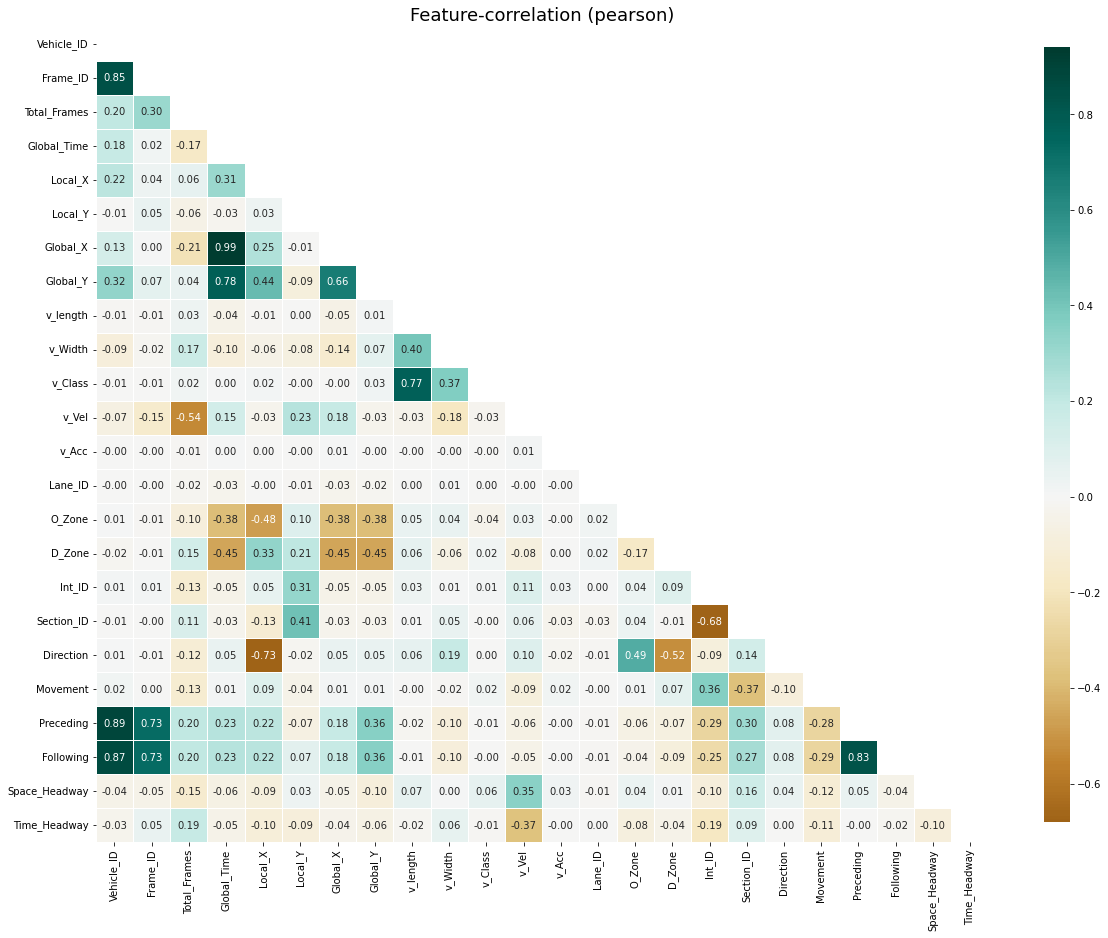

In [ ]:
klib.corr_plot(df, annot = True, figsize = (20,15))

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

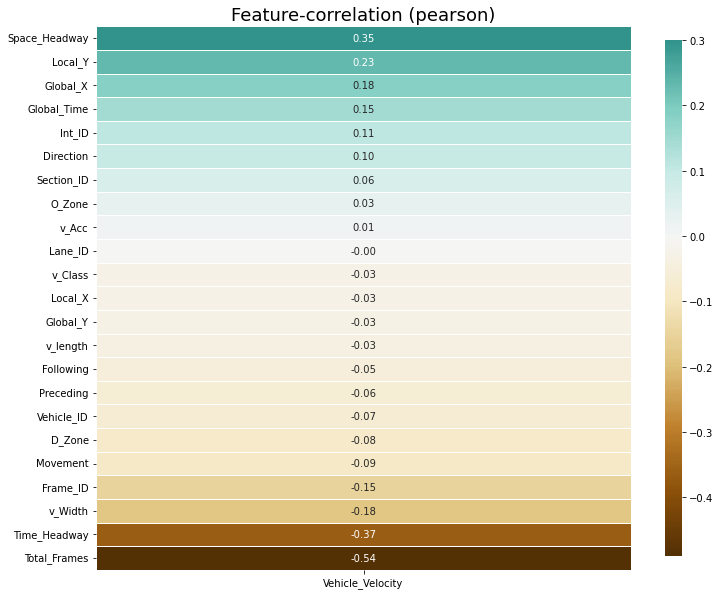

In [ ]:
# default representation of correlations with the feature column (Vehicle velocity)
klib.corr_plot(df, target='Vehicle_Velocity')


## Understanding the data

In [ ]:
df.head()

Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
2        2224      6548          1902  1113437421700   41.429   472.901   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  D_Zone  Int_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN     NaN   
2  6042814.264  2133542.012      14.3      6.9  ...     NaN     NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN     NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN     NaN   

   Section_ID  Direction  Movement  Preceding  Following  Space_Headway  \
0         NaN        NaN       NaN        500        523         119.10   
1         NaN        NaN       NaN        500        523         119.10   
2         NaN        NaN       NaN       2208       2211          53.34   
3         NaN        NaN       NaN       2124       2132          48.92   
4         NaN        NaN       NaN       1029       1040          38.81   

   Time_Headway  Location  
0          5.11    us-101  
1          5.11    us-101  
2          2.01      i-80  
3          1.30    us-101  
4          0.92    us-101  

[5 rows x 25 columns]

In [ ]:
df.shape

(11850526, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850526 entries, 0 to 11850525
Data columns (total 25 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle_ID     int64  
 1   Frame_ID       int64  
 2   Total_Frames   int64  
 3   Global_Time    int64  
 4   Local_X        float64
 5   Local_Y        float64
 6   Global_X       float64
 7   Global_Y       float64
 8   v_length       float64
 9   v_Width        float64
 10  v_Class        int64  
 11  v_Vel          float64
 12  v_Acc          float64
 13  Lane_ID        int64  
 14  O_Zone         float64
 15  D_Zone         float64
 16  Int_ID         float64
 17  Section_ID     float64
 18  Direction      float64
 19  Movement       float64
 20  Preceding      int64  
 21  Following      int64  
 22  Space_Headway  float64
 23  Time_Headway   float64
 24  Location       object 
dtypes: float64(16), int64(8), object(1)
memory usage: 2.2+ GB


In [ ]:
df.describe().T

count          mean           std           min  \
Vehicle_ID     11850526.0  1.272563e+03  7.792891e+02  1.000000e+00   
Frame_ID       11850526.0  5.174503e+03  2.608943e+03  1.000000e+00   
Total_Frames   11850526.0  8.930487e+02  4.020496e+02  2.000000e+00   
Global_Time    11850526.0  1.034354e+12  2.915348e+11  1.163019e+09   
Local_X        11850526.0  2.794686e+01  2.495012e+01 -3.256250e+02   
Local_Y        11850526.0  9.168111e+02  5.502644e+02  0.000000e+00   
Global_X       11850526.0  5.982983e+06  1.076391e+06  2.230210e+06   
Global_Y       11850526.0  1.936843e+06  2.008363e+05  1.375533e+06   
v_length       11850526.0  1.569627e+01  5.611962e+00  3.500000e+00   
v_Width        11850526.0  6.626444e+00  8.725600e-01  2.000000e+00   
v_Class        11850526.0  2.023950e+00  1.767097e-01  1.000000e+00   
v_Vel          11850526.0  2.325818e+01  1.574182e+01  0.000000e+00   
v_Acc          11850526.0  7.139650e-02  4.777451e+00 -1.584000e+01   
Lane_ID        11850526.0  4.265429e+00  9.729954e+01  0.000000e+00   
O_Zone          2481206.0  1.070281e+02  6.164081e+00  0.000000e+00   
D_Zone          2481206.0  2.066535e+02  5.856079e+00  2.010000e+02   
Int_ID          2481206.0  5.623104e-01  1.231587e+00  0.000000e+00   
Section_ID      2481206.0  2.280568e+00  1.532248e+00  0.000000e+00   
Direction       2481206.0  2.994319e+00  1.025410e+00  1.000000e+00   
Movement        2481206.0  1.095966e+00  3.727930e-01  1.000000e+00   
Preceding      11850526.0  1.172694e+03  8.358323e+02  0.000000e+00   
Following      11850526.0  1.181218e+03  8.371065e+02  0.000000e+00   
Space_Headway  11850526.0  6.241838e+01  7.392077e+01  0.000000e+00   
Time_Headway   11850526.0  5.748307e+02  2.312329e+03  0.000000e+00   

                        25%           50%           75%           max  
Vehicle_ID     6.330000e+02  1.195000e+03  1.824000e+03  3.366000e+03  
Frame_ID       2.987000e+03  5.222000e+03  7.354000e+03  1.169100e+04  
Total_Frames   6.190000e+02  8.240000e+02  1.038000e+03  2.434000e+03  
Global_Time    1.113437e+12  1.118847e+12  1.118849e+12  1.118938e+12  
Local_X        1.453300e+01  2.932300e+01  4.332900e+01  1.608840e+02  
Local_Y        4.512030e+02  8.573970e+02  1.351873e+03  2.235252e+03  
Global_X       6.042757e+06  6.451253e+06  6.452048e+06  6.452741e+06  
Global_Y       1.872593e+06  1.873236e+06  2.133669e+06  2.134845e+06  
v_length       1.380000e+01  1.500000e+01  1.600000e+01  7.770000e+01  
v_Width        5.900000e+00  6.800000e+00  7.000000e+00  8.500000e+00  
v_Class        2.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  
v_Vel          1.000000e+01  2.300000e+01  3.500000e+01  9.530000e+01  
v_Acc         -5.200000e-01  0.000000e+00  7.300000e-01  1.584000e+01  
Lane_ID        2.000000e+00  3.000000e+00  5.000000e+00  9.999000e+03  
O_Zone         1.020000e+02  1.080000e+02  1.080000e+02  1.230000e+02  
D_Zone         2.010000e+02  2.050000e+02  2.080000e+02  2.230000e+02  
Int_ID         0.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00  
Section_ID     1.000000e+00  2.000000e+00  3.000000e+00  6.000000e+00  
Direction      2.000000e+00  3.000000e+00  4.000000e+00  4.000000e+00  
Movement       1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  
Preceding      4.690000e+02  1.107000e+03  1.783000e+03  3.366000e+03  
Following      4.790000e+02  1.117000e+03  1.793000e+03  3.366000e+03  
Space_Headway  3.140000e+01  4.977000e+01  7.434000e+01  1.855750e+03  
Time_Headway   1.690000e+00  2.560000e+00  4.200000e+00  3.186408e+04

In [ ]:
df.isnull().sum()

Vehicle_ID             0
Frame_ID               0
Total_Frames           0
Global_Time            0
Local_X                0
Local_Y                0
Global_X               0
Global_Y               0
v_length               0
v_Width                0
v_Class                0
v_Vel                  0
v_Acc                  0
Lane_ID                0
O_Zone           9369320
D_Zone           9369320
Int_ID           9369320
Section_ID       9369320
Direction        9369320
Movement         9369320
Preceding              0
Following              0
Space_Headway          0
Time_Headway           0
Location               0
dtype: int64

In [ ]:
df.columns

Index(['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class',
       'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID',
       'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway',
       'Time_Headway', 'Location'],
      dtype='object')

In [ ]:
df.nunique()

Vehicle_ID          3233
Frame_ID           11691
Total_Frames        1837
Global_Time        88516
Local_X           151978
Local_Y          2012945
Global_X         2007060
Global_Y         3833428
v_length             362
v_Width               58
v_Class                3
v_Vel               8986
v_Acc               3167
Lane_ID               18
O_Zone                22
D_Zone                20
Int_ID                 6
Section_ID             7
Direction              4
Movement               3
Preceding           3228
Following           3234
Space_Headway      88292
Time_Headway       64492
Location               4
dtype: int64

In [ ]:
# Percentage of missing values in dataset
df.isnull().mean().round(4)*100

Vehicle_ID        0.00
Frame_ID          0.00
Total_Frames      0.00
Global_Time       0.00
Local_X           0.00
Local_Y           0.00
Global_X          0.00
Global_Y          0.00
v_length          0.00
v_Width           0.00
v_Class           0.00
v_Vel             0.00
v_Acc             0.00
Lane_ID           0.00
O_Zone           79.06
D_Zone           79.06
Int_ID           79.06
Section_ID       79.06
Direction        79.06
Movement         79.06
Preceding         0.00
Following         0.00
Space_Headway     0.00
Time_Headway      0.00
Location          0.00
dtype: float64

## Relationship analysis

In [ ]:
corelation = df.corr()

<AxesSubplot:>

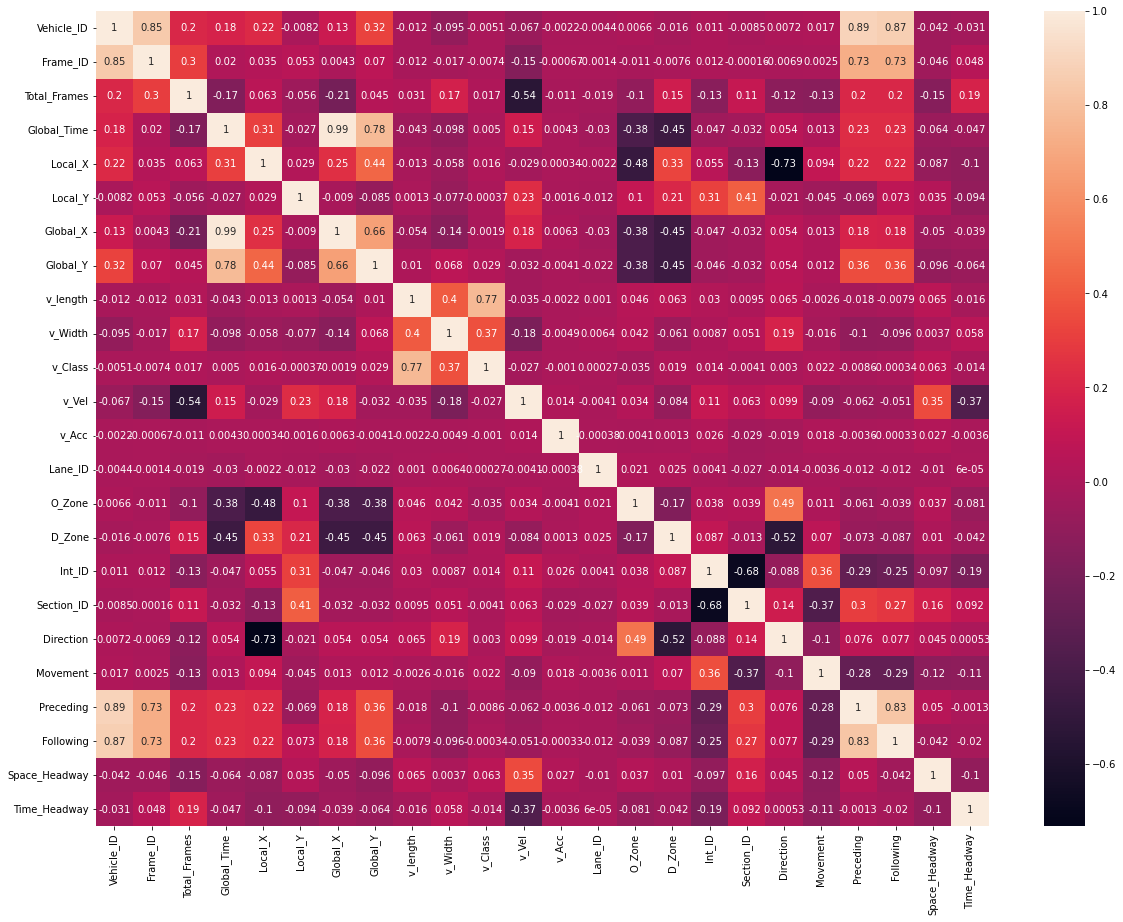

In [ ]:
corelation = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [ ]:
# sns.pairplot(df)

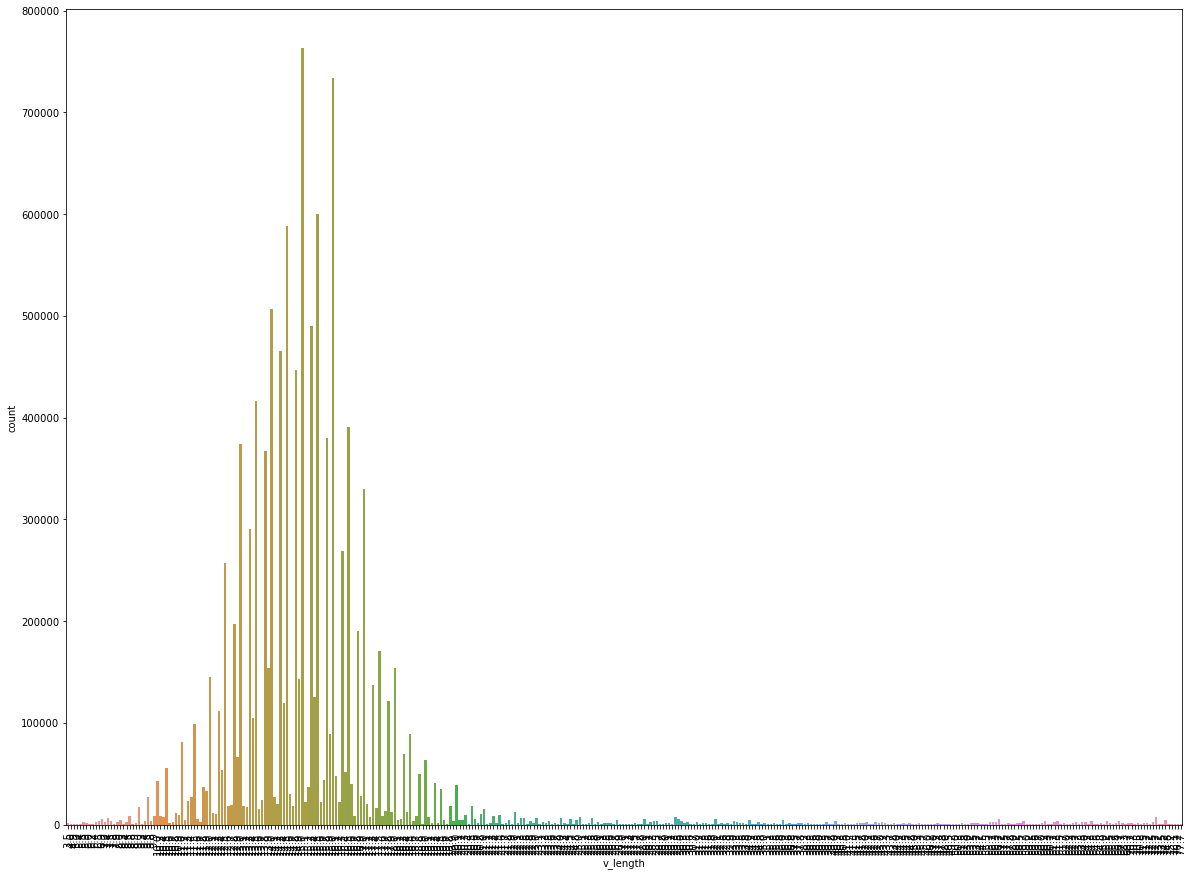

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data = df, x = "v_length")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Location', ylabel='count'>

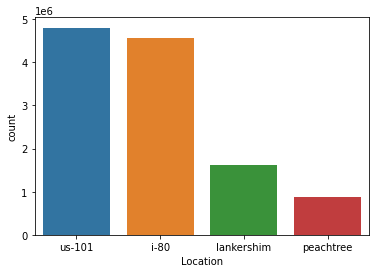

In [ ]:
sns.countplot(data = df, x = "Location")

In [ ]:
df1 = df

In [ ]:
df1["Vehicle_class"] = df["v_Class"].map({1:"motorcycle", 2: "auto", 3: "truck"})

In [ ]:
df1.head()

Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
2        2224      6548          1902  1113437421700   41.429   472.901   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  ...  Int_ID  Section_ID  \
0  6451203.729  1873252.549      13.0      6.9  ...     NaN         NaN   
1  6451203.729  1873252.549      13.0      6.9  ...     NaN         NaN   
2  6042814.264  2133542.012      14.3      6.9  ...     NaN         NaN   
3  6452425.122  1872172.475      13.5      6.9  ...     NaN         NaN   
4  6452347.673  1872258.452      13.5      4.4  ...     NaN         NaN   

   Direction  Movement  Preceding  Following  Space_Headway  Time_Headway  \
0        NaN       NaN        500        523         119.10          5.11   
1        NaN       NaN        500        523         119.10          5.11   
2        NaN       NaN       2208       2211          53.34          2.01   
3        NaN       NaN       2124       2132          48.92          1.30   
4        NaN       NaN       1029       1040          38.81          0.92   

   Location  Vehicle_class  
0    us-101           auto  
1    us-101           auto  
2      i-80           auto  
3    us-101           auto  
4    us-101           auto  

[5 rows x 26 columns]

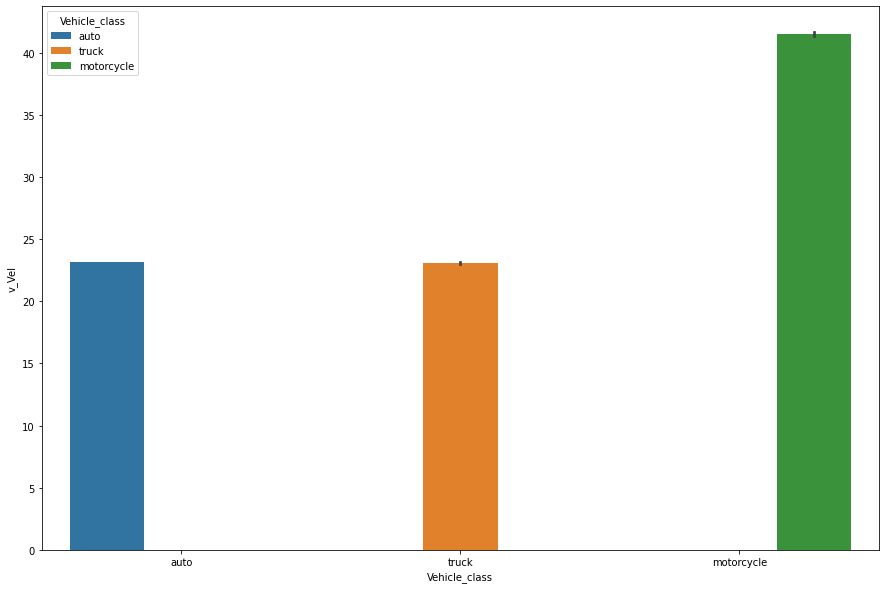

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = df1, x = "Vehicle_class", y = "v_Vel", hue = df["Vehicle_class"])
#plt.xticks([1,2,3], ["motorcycle", "auto", "truck"])
#plt.legend(title='Vehicle class', labels=['motorcycle', 'auto', 'truck'])
plt.show()x

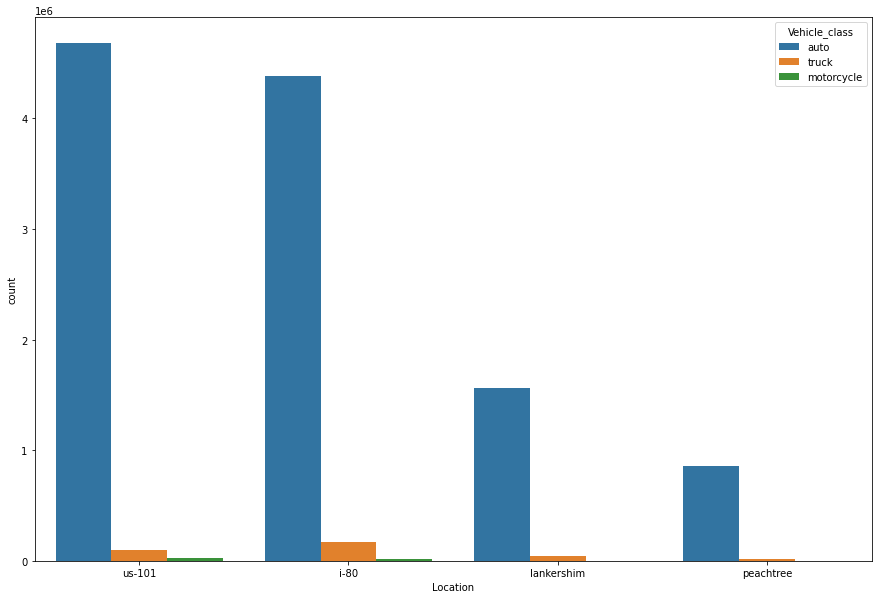

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df1, x= "Location", hue = df["Vehicle_class"])
plt.show()

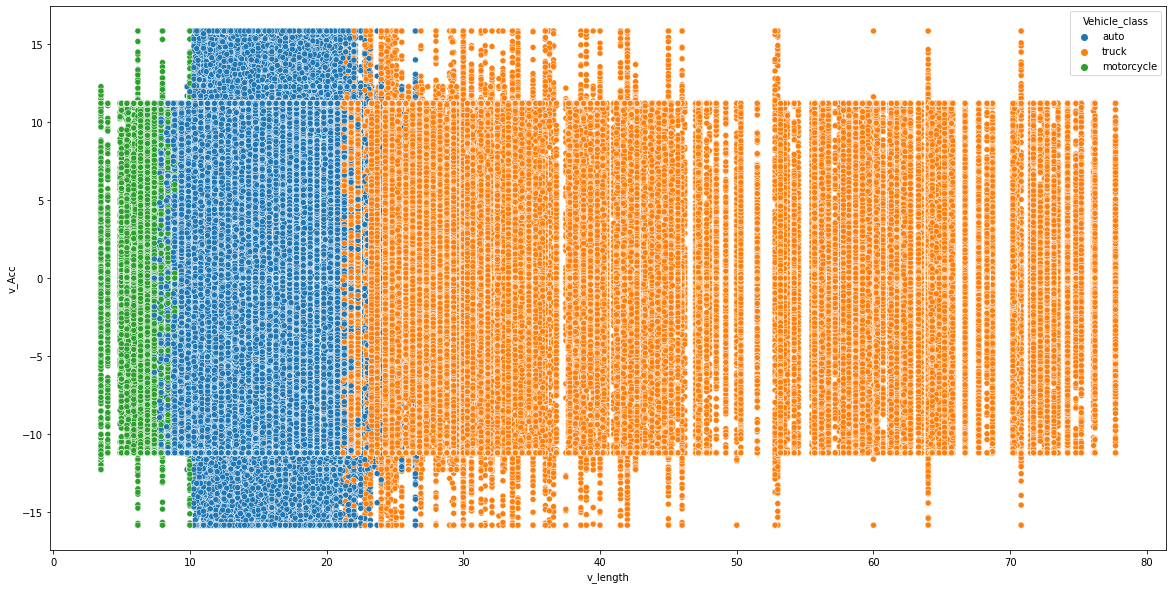

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = df1, x = "v_length", y = "v_Acc", hue = df["Vehicle_class"])
plt.show()

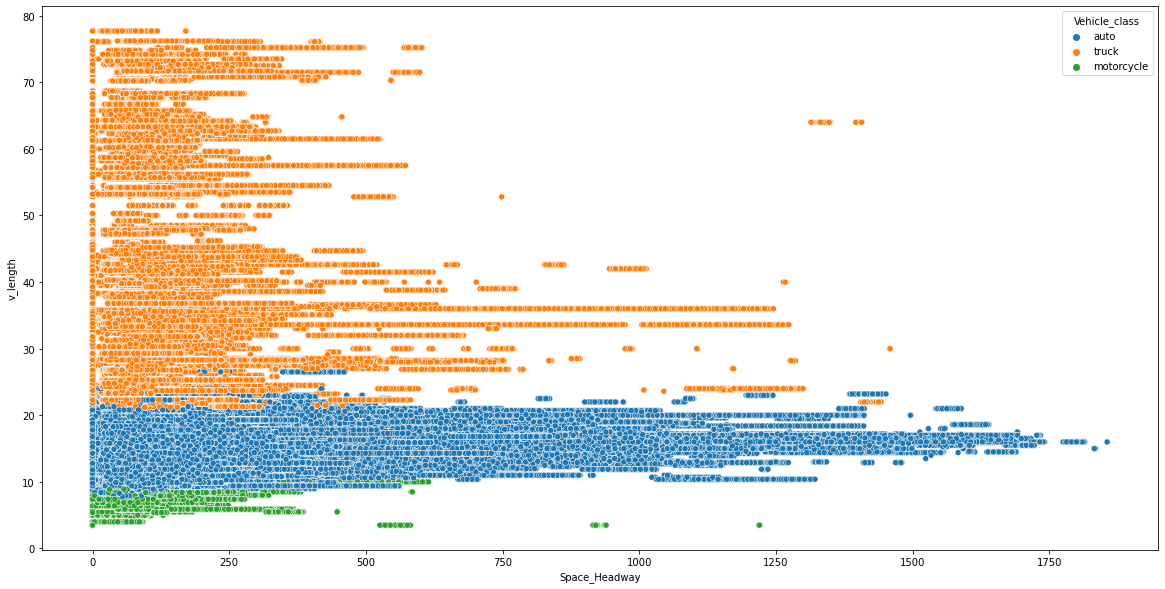

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1,x='Space_Headway',y='v_length',hue='Vehicle_class')
plt.show()

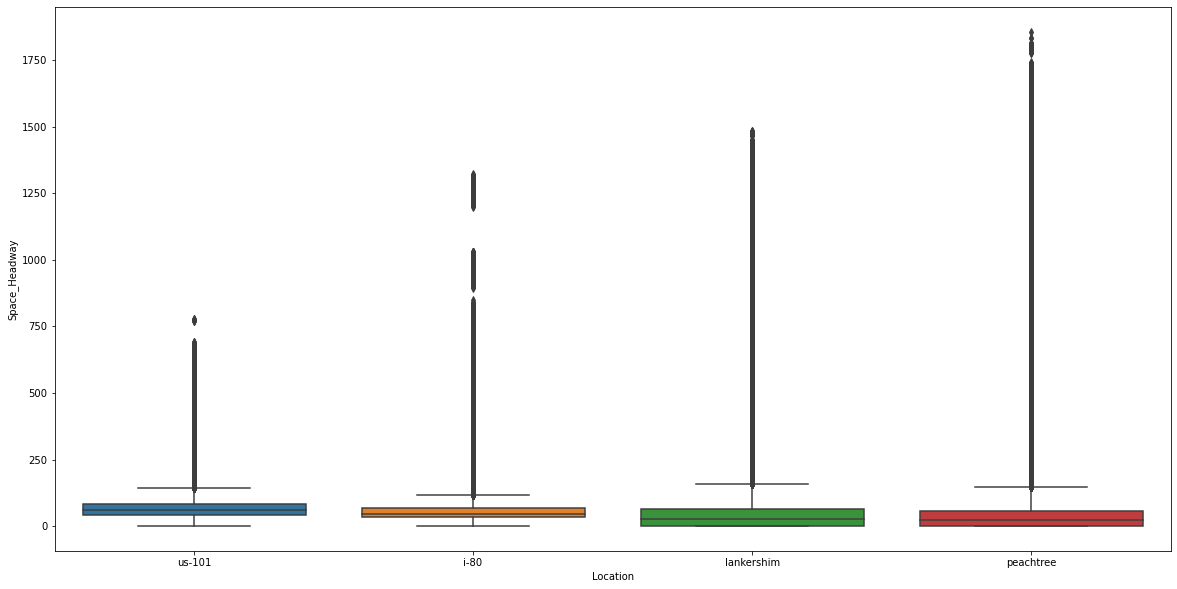

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,y='Space_Headway',x='Location')
plt.show()

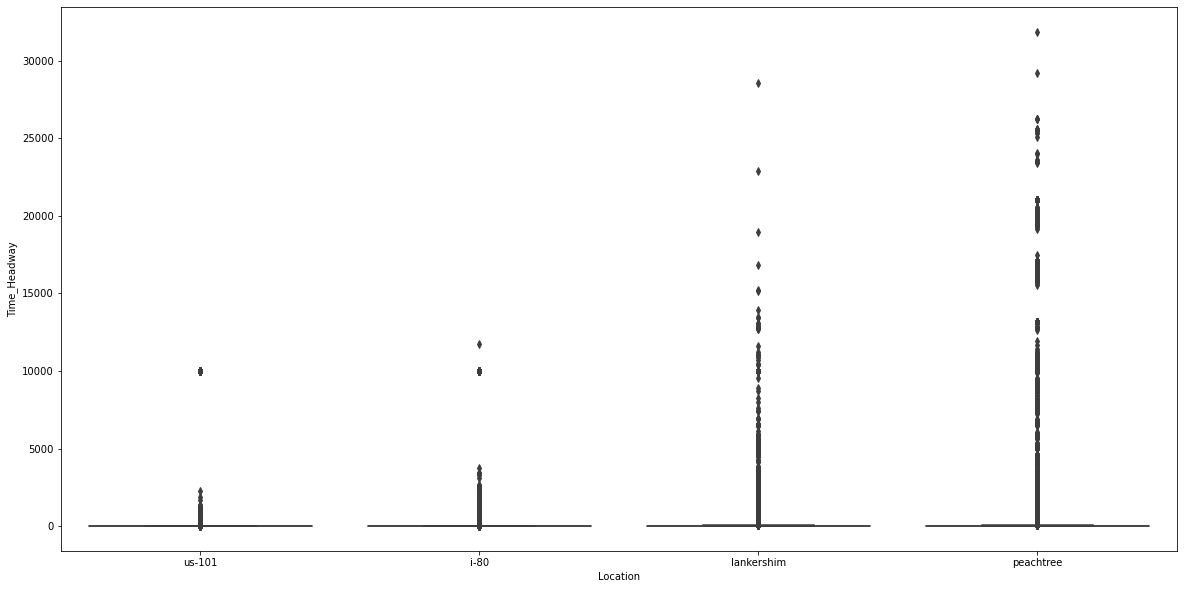

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,y='Time_Headway',x='Location')
plt.show()

In [ ]:
df1["Direction_text"] = df["Direction"].map({1:"east-bound (EB)", 2: "north-bound (NB)", 3: "west-bound (WB)", 4: "south-bound (SB)"})

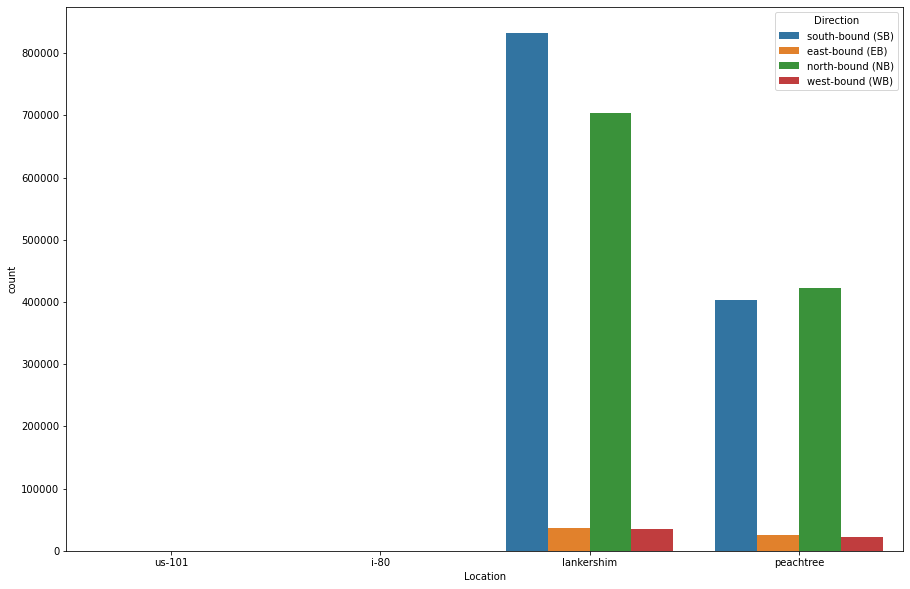

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = df1, x= "Location", hue = df["Direction_text"])
plt.legend(title='Direction')
plt.show()

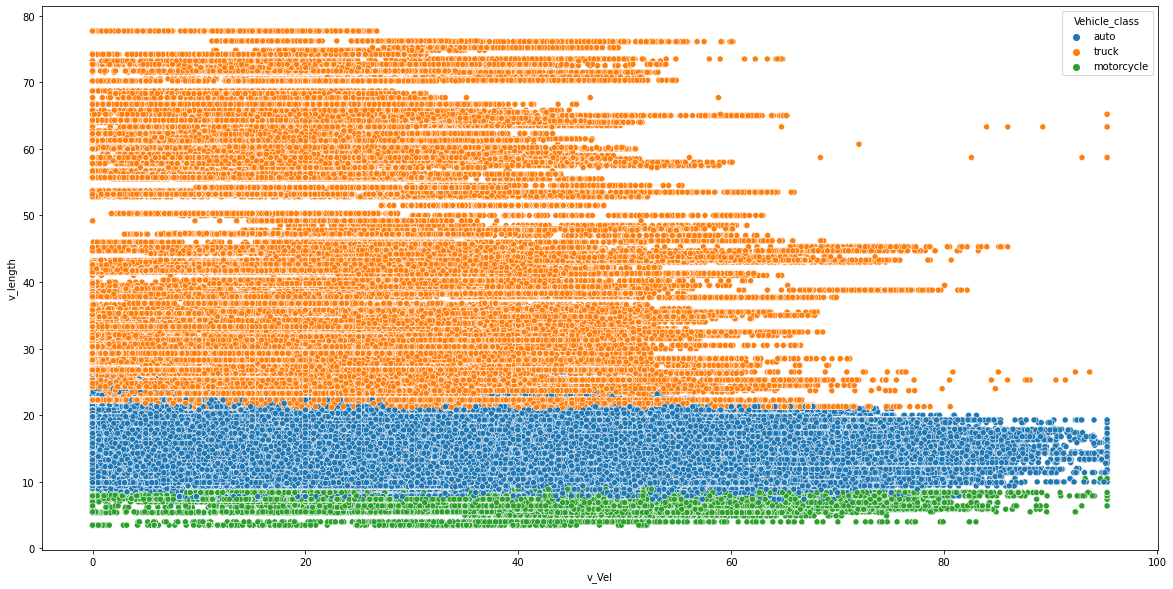

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1,x='Vehicle_Velocity',y='v_length',hue='Vehicle_class')
plt.show()

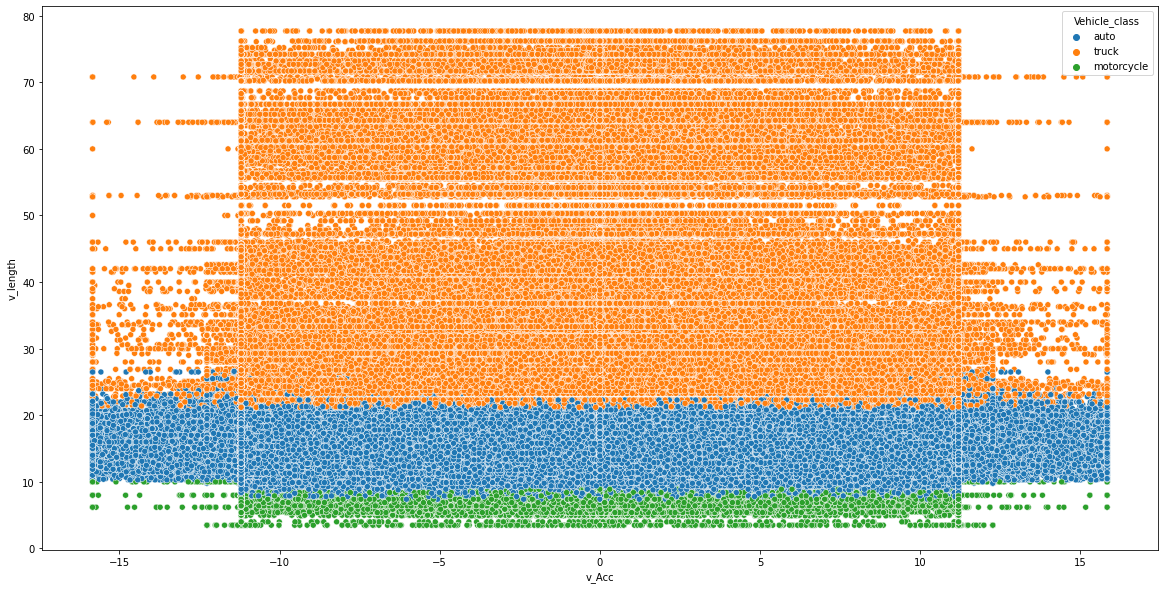

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1,x='v_Acc',y='v_length',hue='Vehicle_class')
plt.show()

In [ ]:
df[['Vehicle_ID','Preceding', 'Following']].nunique()

Vehicle_ID    3233
Preceding     3228
Following     3234
dtype: int64

In [ ]:
df[['Vehicle_ID', 'v_Class', 'Preceding', 'Following']]

Vehicle_ID  v_Class  Preceding  Following
0                515        2        500        523
1                515        2        500        523
2               2224        2       2208       2211
3               2127        2       2124       2132
4               1033        2       1029       1040
...              ...      ...        ...        ...
11850521        1355        2       1351       1361
11850522        1474        2       1468       1480
11850523         398        2        385        406
11850524         599        2          0        611
11850525        2006        2       2009       2014

[11850526 rows x 4 columns]

In [ ]:
df2 = df[((df['Vehicle_ID']==29) & (df['Preceding']==157)) | ((df['Vehicle_ID']==152) & (df['Preceding']==157)) | ((df['Vehicle_ID']==186) & (df['Preceding']==29))]

In [ ]:
def pair(row):
  if row['Vehicle_ID'] == 29:
    return 'M - A'
  elif row['Vehicle_ID'] == 152:
    return 'A - A'
  elif row['Vehicle_ID'] == 186:
    return 'A - M'
  else:
    return 'Undefined'

df2['pair'] = df2.apply(pair, axis=1)

C:\Users\rakes\AppData\Local\Temp\ipykernel_26716\1288301932.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pair'] = df2.apply(pair, axis=1)


In [ ]:
df2[df2['Vehicle_ID']==29]

Vehicle_ID  Frame_ID  Total_Frames  Global_Time  Local_X  Local_Y  \
249238           29       850          1144   1163115300  -17.179  271.405   
829096           29       852          1144   1163115500  -17.179  271.405   
1681776          29       851          1144   1163115400  -17.179  271.405   
3300518          29       854          1144   1163115700  -17.179  271.405   
5400573          29       849          1144   1163115200  -17.179  271.405   
7003063          29       853          1144   1163115600  -17.179  271.405   

            Global_X     Global_Y  v_length  v_Width  ...  Int_ID  Section_ID  \
249238   2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   
829096   2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   
1681776  2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   
3300518  2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   
5400573  2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   
7003063  2230518.917  1375804.598       3.5      6.5  ...     0.0         2.0   

         Direction  Movement  Preceding  Following  Space_Headway  \
249238         4.0       1.0        157       1669            0.0   
829096         4.0       1.0        157       1669            0.0   
1681776        4.0       1.0        157       1669            0.0   
3300518        4.0       1.0        157       1669            0.0   
5400573        4.0       1.0        157       1669            0.0   
7003063        4.0       1.0        157       1669            0.0   

         Time_Headway   Location   pair  
249238            0.0  peachtree  M - A  
829096            0.0  peachtree  M - A  
1681776           0.0  peachtree  M - A  
3300518           0.0  peachtree  M - A  
5400573           0.0  peachtree  M - A  
7003063           0.0  peachtree  M - A  

[6 rows x 26 columns]

In [ ]:
df2.columns

Index(['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class',
       'Vehicle_Velocity', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID',
       'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following',
       'Space_Headway', 'Time_Headway', 'Location', 'pair'],
      dtype='object')

In [ ]:
df2["pair"].unique()

array(['A - A', 'M - A', 'A - M'], dtype=object)

In [ ]:
df2 = df2[(df2["Location"] == "us-101") | (df2["Location"] == "i-80")]

<AxesSubplot:xlabel='Vehicle_Velocity', ylabel='Space_Headway'>

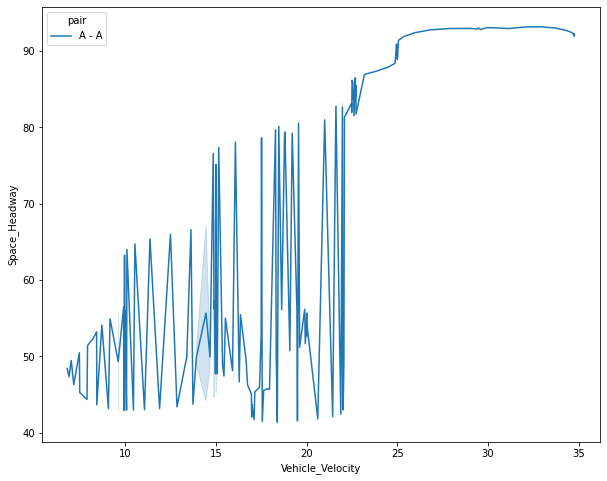

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x = 'Vehicle_Velocity', y = 'Space_Headway', hue='pair', data=df2)

## EDA Part 2

In [ ]:
filtered_ngsim= df[((df['Location'] == 'us-101') | (df['Location'] == 'i-80')) & (df['Preceding']>0) & (df['Following']>0) ]
filtered_ngsim= filtered_ngsim.drop(columns=['Movement', 'Direction','Section_ID','Int_ID','D_Zone','O_Zone','Lane_ID'])

In [ ]:
filtered_ngsim['Preceding_Vehicle_Class'] = np.NaN
filtered_ngsim['Following_Vehicle_Class'] = np.NaN

In [ ]:
filtered_ngsim.head(5)

Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X   Local_Y  \
0         515      2330          1123  1118848075000   30.034   188.062   
1         515      2330          1123  1118848075000   30.034   188.062   
2        2224      6548          1902  1113437421700   41.429   472.901   
3        2127      6459           567  1118847624800   19.632  1775.614   
4        1033      4827           592  1118848324700    6.202  1701.144   

      Global_X     Global_Y  v_length  v_Width  v_Class  Vehicle_Velocity  \
0  6451203.729  1873252.549      13.0      6.9        2             23.31   
1  6451203.729  1873252.549      13.0      6.9        2             23.31   
2  6042814.264  2133542.012      14.3      6.9        2             26.54   
3  6452425.122  1872172.475      13.5      6.9        2             37.52   
4  6452347.673  1872258.452      13.5      4.4        2             41.99   

   v_Acc  Preceding  Following  Space_Headway  Time_Headway Location  \
0   2.05        500        523         119.10          5.11   us-101   
1   2.05        500        523         119.10          5.11   us-101   
2  -0.76       2208       2211          53.34          2.01     i-80   
3  11.20       2124       2132          48.92          1.30   us-101   
4   0.10       1029       1040          38.81          0.92   us-101   

   Preceding_Vehicle_Class  Following_Vehicle_Class  
0                      NaN                      NaN  
1                      NaN                      NaN  
2                      NaN                      NaN  
3                      NaN                      NaN  
4                      NaN                      NaN